# Project: Investigate a Dataset - No show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
>- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>- ‘Neighborhood’ indicates the location of the hospital. 
>- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



>**We will try to understand What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

> We will draw figures display the comparison between the patient show up and other dataset parameters.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.





> ### General Properties

> Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [2]:
#Load data and print out a first 5 lines
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Find the number of patients and there characterestics.

In [3]:
#find the number of rows & colomns
df.shape

(110527, 14)

> We have **110527** Patient and **14** characterestics parameter.

> Inspect data type and looking for missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> No missing data

> Looking for the duplicates in the data.

In [5]:
df.duplicated().sum()

0

> There is no identical duplicates on the data.

> Check the number of unique values.

In [6]:
df['PatientId'].nunique()

62299

> The total number of appountments are **110527**,but the total number of patients who's book the appountments are **62299**.

> check for the duplication ids and have the same Noshow states.

In [7]:
df.duplicated(['PatientId','No-show']).sum()

38710

 > There are 38710 patient have the same states of showing or No-showing.

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- The mean of ages is **37** years.
>- Maximum age is **115** year.
>- There is probably a mistake with one of the patient ages. it shows **-1** year, which doesn't make sense.  

> ### Data Cleaning

> Identify the row index of -1 age value.

In [9]:
outline=df.query('Age==-1')
outline

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> Remove -1 value from the data.

In [10]:
df.drop(index=99832,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Remove the Duplicate IDs with the same showing states.

In [11]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71816, 14)

> We probably won't need the Patient ID, Appountment ID, Scheduled Day and Appointment Day in our analysis, so we can drop them.

In [12]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Rename the "No-show" column to facilitate the analysis. 

> Correct the spelling of "Hipertension".

In [13]:
df.rename(columns={'No-show':'No_show'},inplace=True)
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> ### General look on the data

> Drow histograms for the whole dataset.

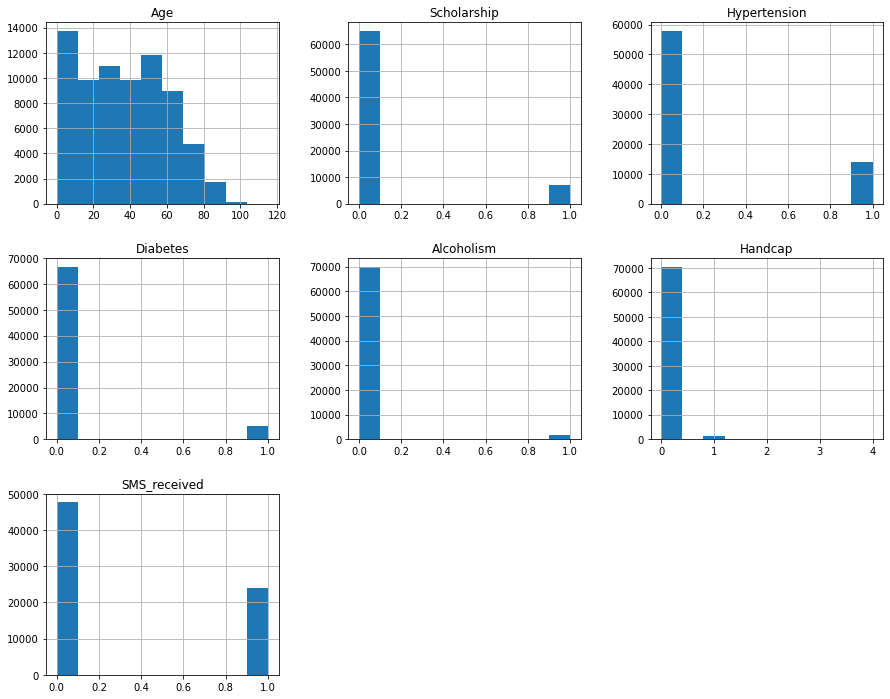

In [14]:
df.hist(figsize=(15,12));

>- Most of the patients didn't suffer from Diabetes, Hypertension nor handcapped.
>- About 20% of the patients suffered from hypertension.
>- Number of patients who received an SMS is half the number of those who did not. 
>- About 10% are enrolled in Brasilian welfare program Bolsa Família.

> Assigning names to show and no show to facilitate recall and comparison.

In [15]:
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

In [16]:
df[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

In [17]:
df[noshow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

> The number of patients who showed about 3 times those who did not show

> ### Analysing other characteristics

> Makes use of function to avoid repetitive code.

In [18]:
def Comparison(df,col_name,attend,absent):
    
    plt.figure(figsize=[14,8])
    df[col_name][attend].hist(alpha=0.5, label= 'show')
    df[col_name][absent].hist(alpha=0.5, label= 'noshow')
    plt.legend()
    plt.title('Comparison according to {}'.format(col_name))
    plt.xlabel(col_name)
    plt.ylabel('Patient Number');

> **Compare those who showed to those who didn't according to Gender.**

> We want to know if the show/noshow in the appointment is depend on being male/female or not ?

> So we need to display the amount of show/noshow for males and females in the dataset.

Gender
No_show Gender        
False   F        34960
        M        19193
True    F        11506
        M         6157

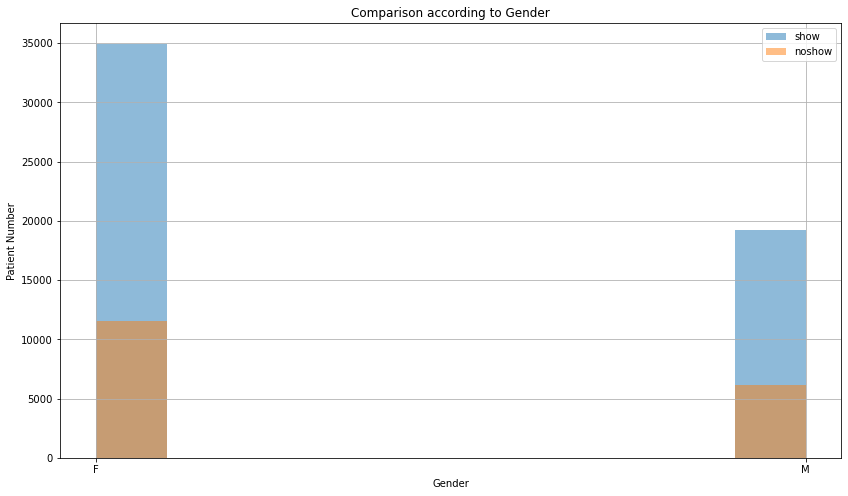

In [19]:
Comparison(df,'Gender',show,noshow)
pd.DataFrame(df.groupby(noshow)['Gender'].value_counts())

> The ratio of show/noshow for both males and females is manly the same.

>**Gender is insignificant parameter. Females who showed were more than males who did, And females who did not show were also more than males who did not.**

> **Compare those who showed to those who didn't according to Age.**

> We want to know if the show/noshow in the appointment is depend on the age of the patient ?

> So we need to display the amount of show/noshow for all ages in the dataset.

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
False,54153.0,37.229166,23.710145,0.0,17.0,37.0,56.0,115.0
True,17663.0,34.376267,22.192819,0.0,16.0,33.0,51.0,115.0


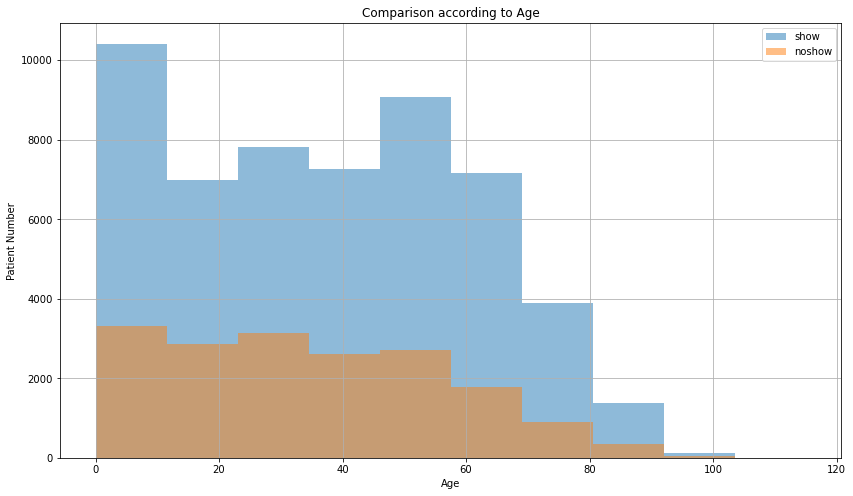

In [20]:
Comparison(df,'Age',show,noshow)
pd.DataFrame(df.groupby(noshow)['Age'].describe())

>- **Patients between 0-10 years showed more than all the other age groups.Followed by from 45-55 years.**
>- **The older they get, The less they tend to get the appountment.**

> **Compare those who showed to those who didn't according to Neighbourhood.**

> We want to know if some places show for the appointments more than other places ?

> So we will display the amount of show/noshow for all places.

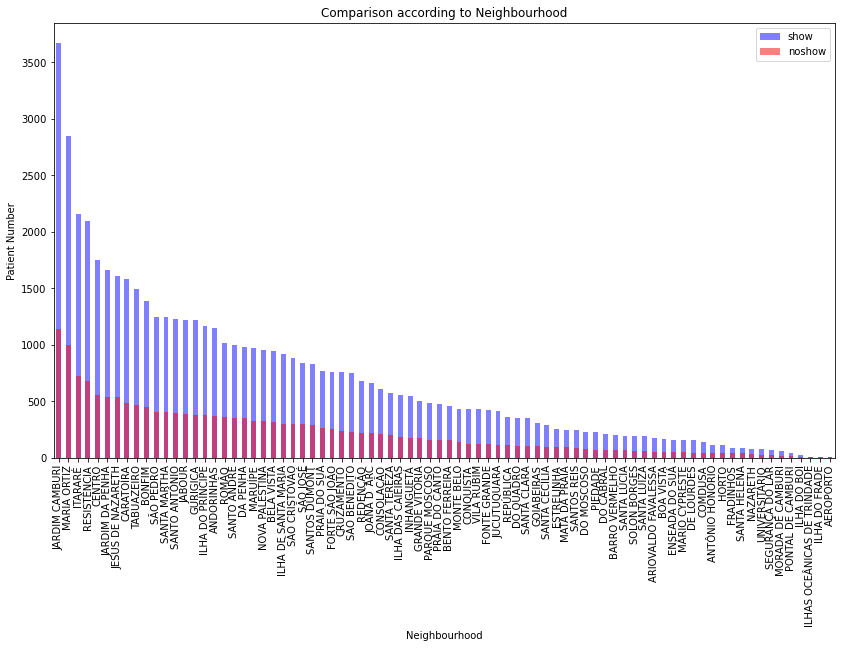

In [21]:
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar', alpha=0.5, color='blue',label= 'show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red',label= 'noshow')
plt.legend()
plt.title('Comparison according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number');

> The ratio of show/noshow for jardim camburi and maria ortiz is less than the other places, so i means that th potentiality of showing in the appointment from those places is more than others.

>**Neighbourhood is significant parameter. And strongly affecting the showing of the patient.**

> **Compare those who showed to those who didn't according to the enrollment in the Brasilian welfare program.**

> We want to know if the patient enroll to the Brasilian welfare program, he will show for the appointments or not ?

> So we will display the amount of show/noshow for both who enroll the program and who don't.

Scholarship
No_show Scholarship             
False   0                  49207
        1                   4946
True    0                  15748
        1                   1915

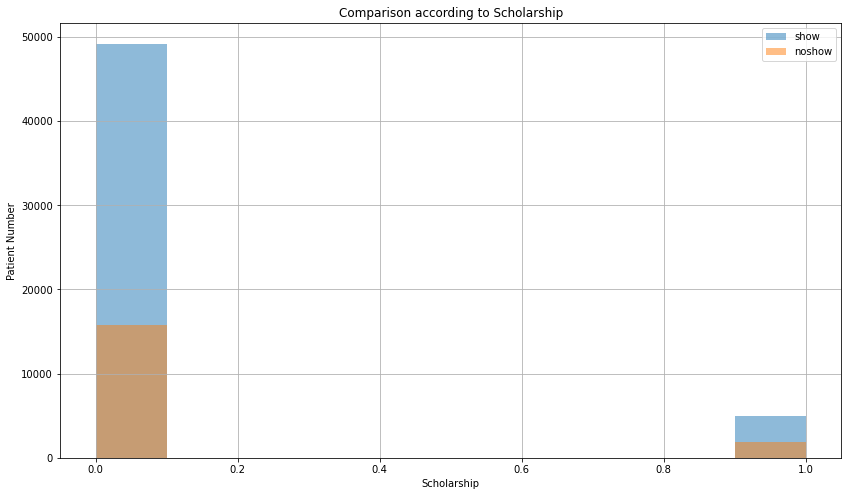

In [22]:
Comparison(df,'Scholarship',show,noshow)
pd.DataFrame(df.groupby(noshow)['Scholarship'].value_counts())

> The ratio of show/noshow for both who enroll and who don't is manly the same.

> **Being enrollment in the Brasilian welfare program is insignificant parameter.**

> **Compare those who showed to those who didn't according to Hypertension.**

> Let's think if the Hypertension affect on attending the appointment ? 

> So we will display the amount of show/noshow for both who have Hypertension and who have not.

Hypertension
No_show Hypertension              
False   0                    43163
        1                    10990
True    0                    14644
        1                     3019

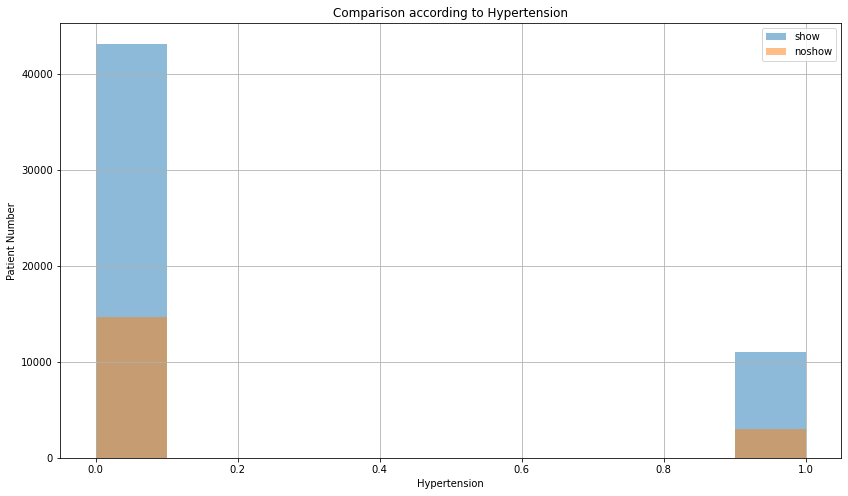

In [23]:
Comparison(df,'Hypertension',show,noshow)
pd.DataFrame(df.groupby(noshow)['Hypertension'].value_counts())

> The ratio of show/noshow for both who have Hypertension and who have not is manly the same.

> **Hypertension is insignificant parameter.**

> **Compare those who showed to those who didn't according to Diabetes.**

> Let's think if the Diabetes affect on attending the appointment ?

> So we will display the amount of show/noshow for both who have Diabetes and who have not.

Diabetes
No_show Diabetes          
False   0            50207
        1             3946
True    0            16513
        1             1150

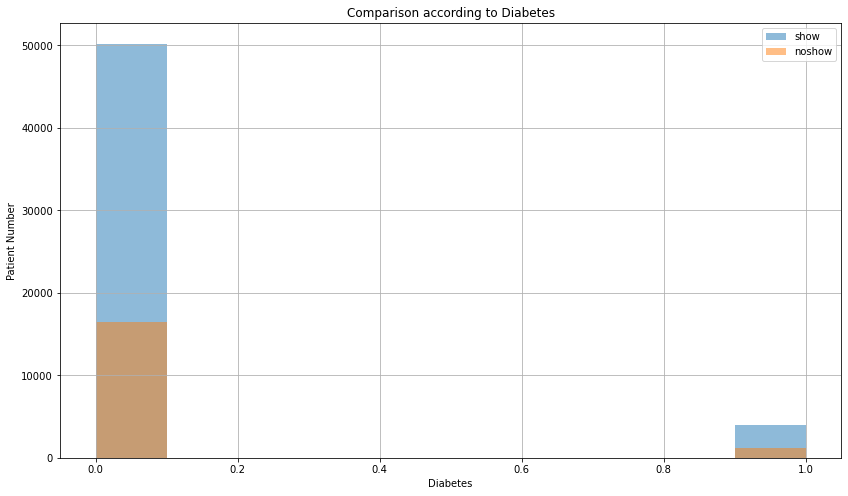

In [24]:
Comparison(df,'Diabetes',show,noshow)
pd.DataFrame(df.groupby(noshow)['Diabetes'].value_counts())

> The ratio of show/noshow for both who have Diabetes and who have not is manly the same.

> **Diabetes is insignificant parameter.**

> **Compare those who showed to those who didn't according to Alcoholism.**

> let's see if the alcoholic patient didn't attend the appointment more than other peaple ?

> So we will display the amount of show/noshow for both alcoholic patient and non alcoholic patient.

Alcoholism
No_show Alcoholism            
False   0                52875
        1                 1278
True    0                17143
        1                  520

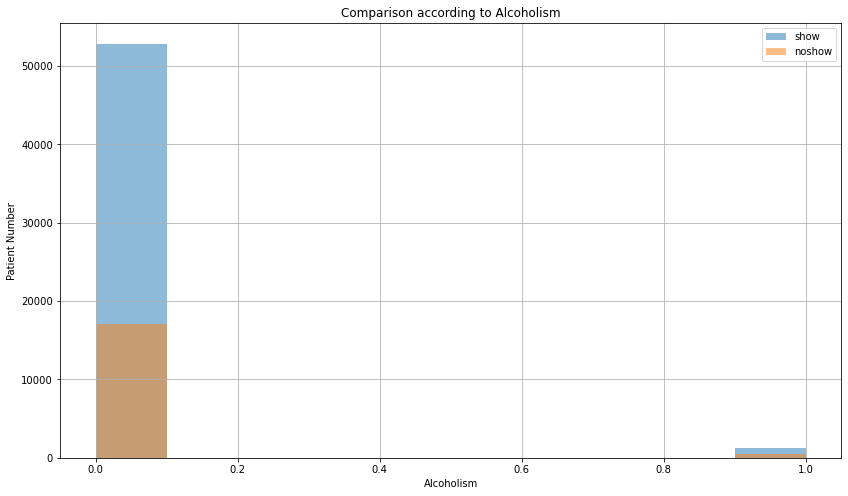

In [25]:
Comparison(df,'Alcoholism',show,noshow)
pd.DataFrame(df.groupby(noshow)['Alcoholism'].value_counts())

> The number of non alcoholic patient is too much bigger than the alcoholic patient.

> **Alcoholism is insignificant parameter.**

> **Compare those who showed to those who didn't according to being handcapped.**

> We want to know if the show/noshow in the appointment is depend on being handcapped ?

> So we will display the amount of show/noshow for both handcapped patient and non handcapped patient.

Handcap
No_show Handcap         
False   0          53126
        1            931
        2             89
        3              5
        4              2
True    0          17385
        1            247
        2             27
        3              3
        4              1

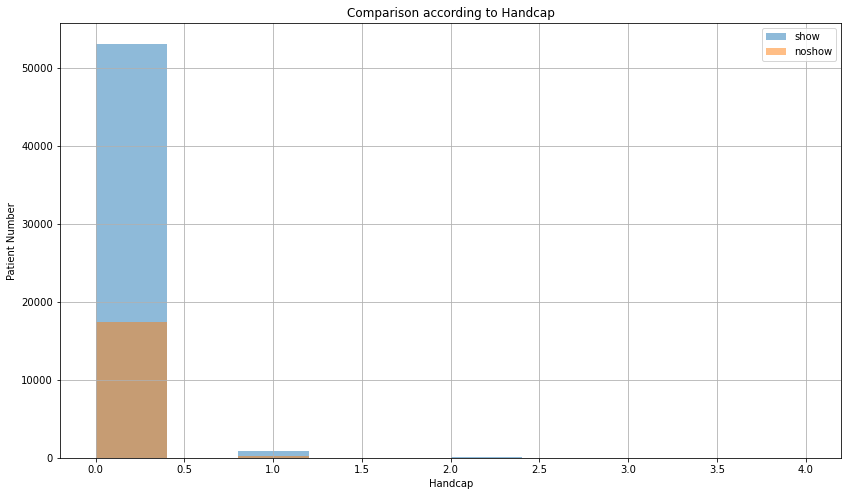

In [26]:
Comparison(df,'Handcap',show,noshow)
pd.DataFrame(df.groupby(noshow)['Handcap'].value_counts())

> The number of non handcapped patient is too much bigger than the handcapped patient.

> **Handcap is insignificant parameter.**

> **Compare those who showed to those who didn't according to SMS received.**

> let's see if the patients whose received SMS message will show for the appointment more than other patients or not ?

> So we will display the amount of show/noshow for both patients whose received SMS message and whose didn't receive.

SMS_received
No_show SMS_received              
False   0                    38057
        1                    16096
True    0                     9660
        1                     8003

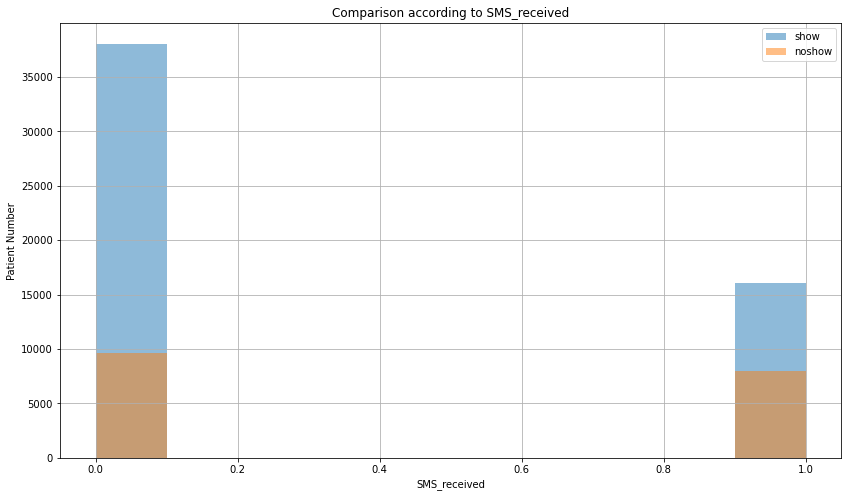

In [27]:
Comparison(df,'SMS_received',show,noshow)
pd.DataFrame(df.groupby(noshow)['SMS_received'].value_counts())

> **More patients show without received SMS massage,which is strange.**

<a id='conclusions'></a>
## Conclusions

> We test the statistical significance to estimate the probability that a relationship observed in the data occurred only by chance; the probability that the variables are really related in the population. They can be used to filter out unpromising hypotheses.

> And we find that :
>- At the end, I can say that neighbourhood is strongly related to the patients showing up.
>- Age also has it's role as those between 0-10 years showed more than all the other age groups.Followed by from 45-55 years.
>- Although it sounds strange that more patients showed up without receiving an SMS.


### Limitations

>- The Neighbourhood data need to attatch the distance between each place and the hospital with it, so we can display the relation between distance and show/noshow the appountment.
>- We don't have enough data of Alcoholism(alcoholic patient) and handcap(handcapped patient) to know if it affect the show/noshow of the appountment. 